# Performance measurement in ExSeqProcessing (ver.1.3)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
from IPython.display import display

pd.set_option('float_format', '{:f}'.format)

## top log

In [2]:
proc_stat = pd.read_csv('summary-top-proc-status.csv',parse_dates=[0])
mem_stat = pd.read_csv('summary-top-mem-usage.csv',parse_dates=[0])

In [3]:
proc_stat['elapsed_time'] = pd.to_timedelta(proc_stat['elapsed_time'])
proc_stat['proc'] = proc_stat['proc'].str.rstrip()

mem_stat['elapsed_time'] = pd.to_timedelta(mem_stat['elapsed_time'])

### System memory status

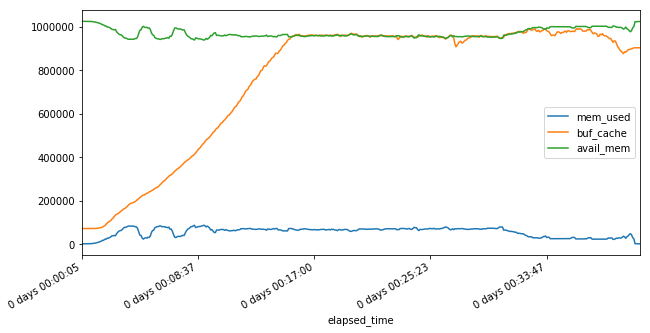

In [4]:
mem_stat.plot(x='elapsed_time',y=['mem_used','buf_cache','avail_mem'],figsize=(10,5))

### MATLAB processes memory status

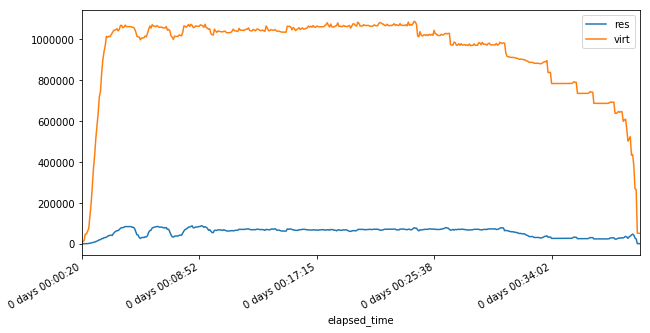

In [5]:
proc_stat.pivot_table(index='elapsed_time',values=['res','virt'],aggfunc=sum).plot(figsize=(10,5))

In [6]:
proc_stat.pivot_table(index='elapsed_time',values=['res','virt'],aggfunc=sum).describe()

,res,virt
count,476.000000,476.000000
mean,56947.346252,939732.010151
std,21168.528835,206620.088867
min,119.896000,845.080000
25%,36221.124000,901879.448000
50%,67545.608000,1031746.440000
75%,71006.143000,1060996.440000
max,88168.104000,1088493.440000


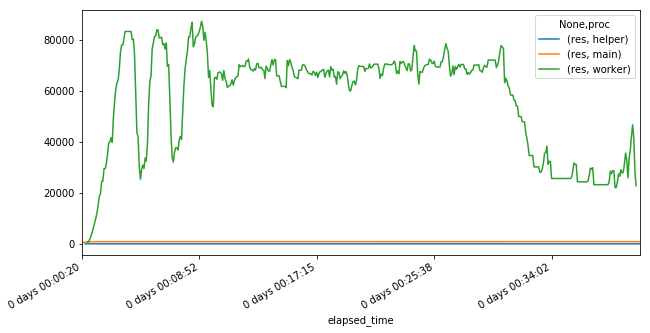

In [7]:
proc_stat.pivot_table(index='elapsed_time',columns=['proc'],values=['res'],aggfunc=sum).plot(figsize=(10,5))

### MATLAB processes cpu and memory usage (%)

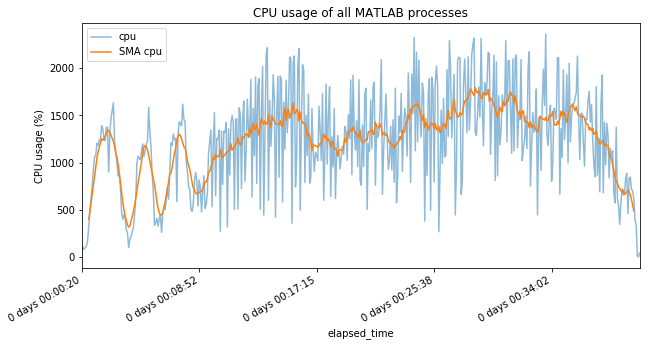

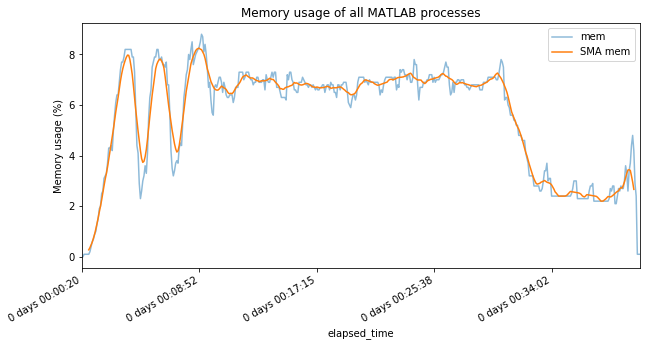

In [8]:
proc_usage = proc_stat.pivot_table(index='elapsed_time',values=['cpu'],aggfunc=sum)
fig = proc_usage.plot(alpha=0.5,figsize=(10,5))
proc_usage.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('CPU usage of all MATLAB processes')
fig.set_ylabel('CPU usage (%)')
fig.legend(['cpu','SMA cpu'])

proc_usage = proc_stat.pivot_table(index='elapsed_time',values=['mem'],aggfunc=sum)
fig = proc_usage.plot(alpha=0.5,figsize=(10,5))
proc_usage.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('Memory usage of all MATLAB processes')
fig.set_ylabel('Memory usage (%)')
fig.legend(['mem','SMA mem'])

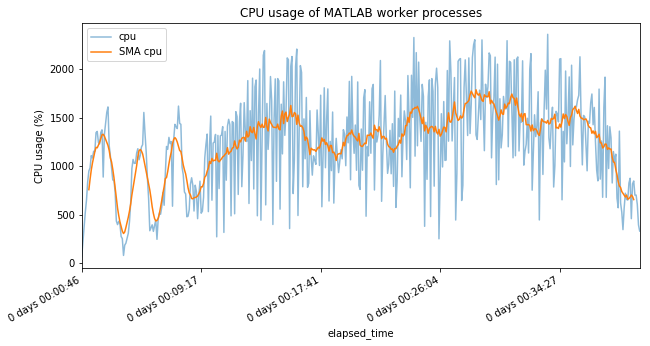

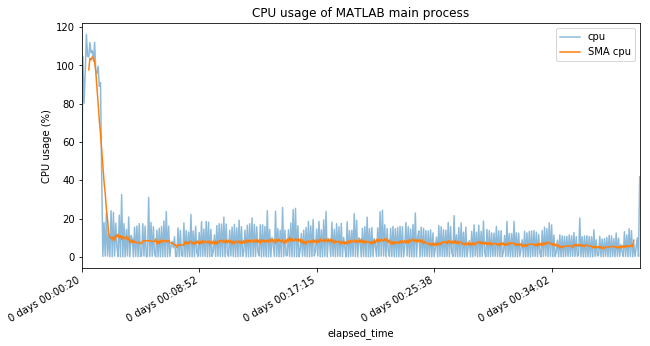

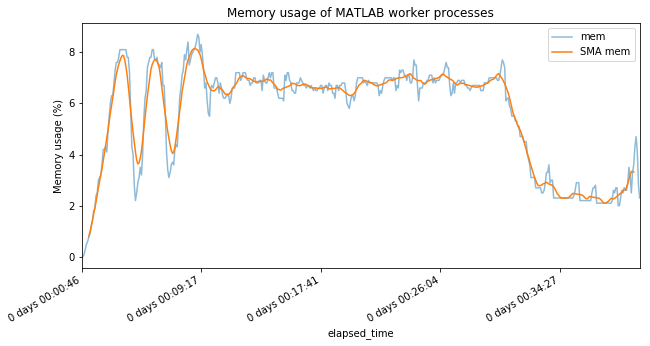

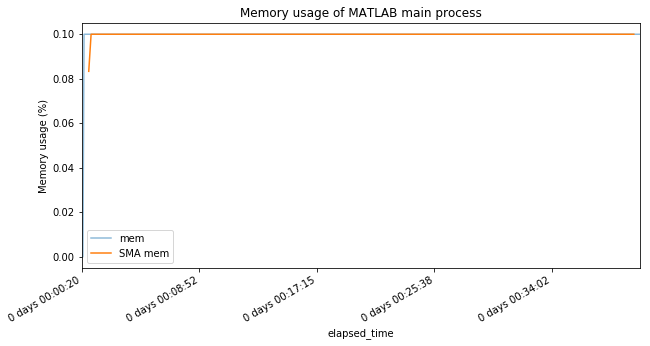

In [9]:
proc_usage_worker = proc_stat[proc_stat['proc'] == 'worker'].pivot_table(index='elapsed_time',values=['cpu'],aggfunc=sum)
fig = proc_usage_worker.plot(y=['cpu'],alpha=0.5,figsize=(10,5))
proc_usage_worker.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('CPU usage of MATLAB worker processes')
fig.set_ylabel('CPU usage (%)')
fig.legend(['cpu','SMA cpu'])

proc_usage_main = proc_stat[proc_stat['proc'] == 'main'].pivot_table(index='elapsed_time',values=['cpu'],aggfunc=sum)
fig = proc_usage_main.plot(y=['cpu'],alpha=0.5,figsize=(10,5))
proc_usage_main.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('CPU usage of MATLAB main process')
fig.set_ylabel('CPU usage (%)')
fig.legend(['cpu','SMA cpu'])

proc_usage_worker = proc_stat[proc_stat['proc'] == 'worker'].pivot_table(index='elapsed_time',values=['mem'],aggfunc=sum)
fig = proc_usage_worker.plot(y=['mem'],alpha=0.5,figsize=(10,5))
proc_usage_worker.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('Memory usage of MATLAB worker processes')
fig.set_ylabel('Memory usage (%)')
fig.legend(['mem','SMA mem'])

proc_usage_main = proc_stat[proc_stat['proc'] == 'main'].pivot_table(index='elapsed_time',values=['mem'],aggfunc=sum)
fig = proc_usage_main.plot(y=['mem'],alpha=0.5,figsize=(10,5))
proc_usage_main.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_title('Memory usage of MATLAB main process')
fig.set_ylabel('Memory usage (%)')
fig.legend(['mem','SMA mem'])

In [10]:
proc_stat.pivot_table(index='elapsed_time',values=['cpu','mem'],aggfunc=sum).describe()

,cpu,mem
count,476.000000,476.000000
mean,1227.382983,5.590126
std,533.658861,2.136462
min,0.200000,0.000000
25%,830.425000,3.475000
50%,1248.000000,6.700000
75%,1599.000000,7.000000
max,2361.700000,8.800000


## nfsiostat log

In [11]:
nfs_stat = pd.read_csv('summary-nfsiostat.csv',parse_dates=[0])

In [12]:
nfs_stat['time'] = pd.to_timedelta(nfs_stat['time'])

### read/write throughput (kb/s)

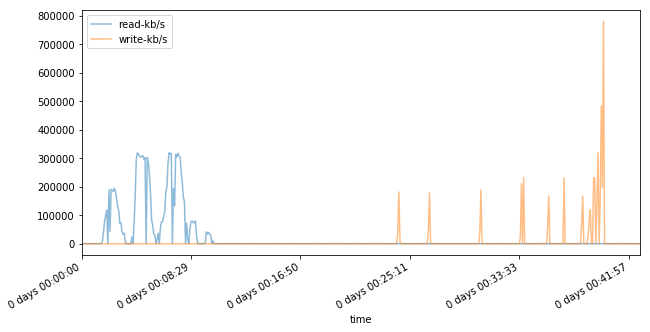

In [13]:
nfs_stat[nfs_stat['fs-path']=='/mp/nas1'].pivot_table(index='time',values=['read-kb/s','write-kb/s']).plot(alpha=0.5,figsize=(10,5))

In [14]:
nfs_stat[nfs_stat['fs-path']=='/mp/nas1'].pivot_table(index='time',values=['read-kb/s','write-kb/s'],aggfunc=sum).describe()

,read-kb/s,write-kb/s
count,511.000000,511.000000
mean,23462.526321,9069.750151
std,69033.737573,53126.991299
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,13.224500
max,319276.045000,780691.602000


### pages in readpages/writepages

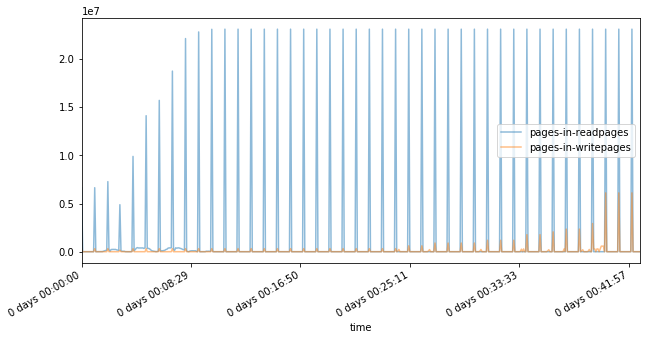

In [15]:
nfs_stat[nfs_stat['fs-path']=='/mp/nas1'].pivot_table(index='time',values=['pages-in-readpages','pages-in-writepages']).plot(alpha=0.5,figsize=(10,5))

## vmstat log

In [16]:
vm_stat = pd.read_csv('summary-vmstat.csv',parse_dates=[0])

In [17]:
vm_stat['time'] = pd.to_timedelta(vm_stat['time'])

### block i/o

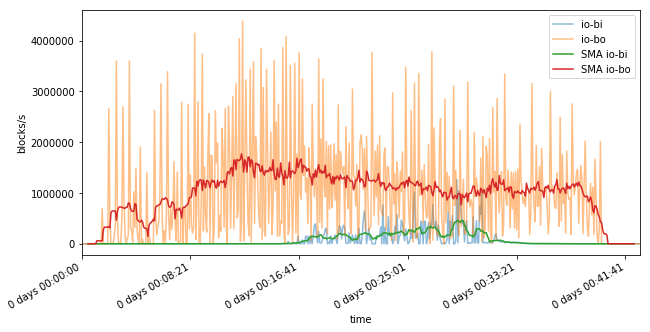

In [18]:
vm_bio = vm_stat.pivot_table(index='time',values=['io-bi','io-bo'])
fig = vm_bio.plot(alpha=0.5,figsize=(10,5))
vm_bio.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_ylabel('blocks/s')
fig.legend(['io-bi','io-bo','SMA io-bi','SMA io-bo'])

In [19]:
vm_stat.pivot_table(index='time',values=['io-bi','io-bo']).describe()

,io-bi,io-bo
count,514.000000,514.000000
mean,70744.817121,976673.778210
std,168477.961096,1018933.629138
min,0.000000,0.000000
25%,32.000000,151002.250000
50%,116.000000,686922.500000
75%,30162.250000,1478134.250000
max,1258270.000000,4383734.000000


### cpu status

Text(0,0.5,'CPU usage (%)')

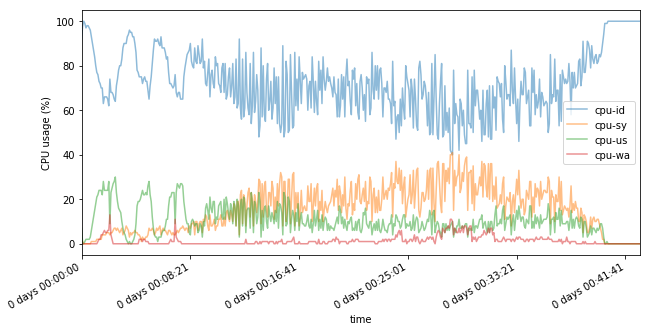

In [20]:
fig = vm_stat.pivot_table(index='time',values=['cpu-us','cpu-sy','cpu-id','cpu-wa','cpu-st']).plot(alpha=0.5,figsize=(10,5))
fig.set_ylabel('CPU usage (%)')

In [21]:
vm_stat.pivot_table(index='time',values=['cpu-us','cpu-sy','cpu-id','cpu-wa','cpu-st']).describe()

,cpu-id,cpu-sy,cpu-us,cpu-wa
count,514.000000,514.000000,514.000000,514.000000
mean,72.616732,15.618677,10.317121,1.410506
std,13.886865,10.287794,6.371126,2.037840
min,40.000000,0.000000,0.000000,0.000000
25%,63.000000,7.000000,6.000000,0.000000
50%,72.000000,15.000000,9.000000,1.000000
75%,81.000000,23.000000,13.000000,2.000000
max,100.000000,41.000000,30.000000,13.000000


## iostat log

In [8]:
io_stat = pd.read_csv('summary-iostat.csv',parse_dates=[0])

In [9]:
io_stat['time'] = pd.to_timedelta(io_stat['time'])

In [10]:
f = open('hostname.txt', 'r')
hostname = f.read()
f.close()

nvmename = 'nvme'
if hostname == 'bonito':
    nvmename = 'nvme0'
elif hostname == 'mackerel':
    nvmename = 'nvme1'
elif hostname == 'tuna':
    nvmename = 'nvme1'

### nvme read/write (kB/s)

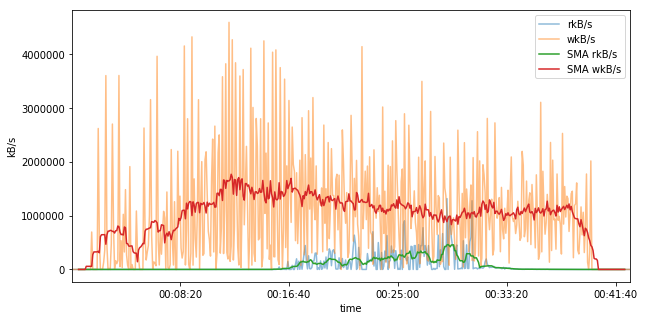

In [11]:
nvme_rw = io_stat[io_stat['device'].str.contains(nvmename)].pivot_table(index='time',values=['rkB/s','wkB/s'],aggfunc=sum)
fig = nvme_rw.plot(alpha=0.5,figsize=(10,5))
nvme_rw.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_ylabel('kB/s')
fig.legend(['rkB/s','wkB/s','SMA rkB/s','SMA wkB/s'])

In [25]:
nvme_rw.describe()

,rkB/s,wkB/s
count,514.000000,514.000000
mean,70739.754786,976663.642782
std,171876.149779,1012494.597430
min,0.000000,0.000000
25%,28.800000,138885.550000
50%,114.280000,684427.750000
75%,27795.000000,1478011.600000
max,1314572.450000,4586560.800000


### nvme util (%)

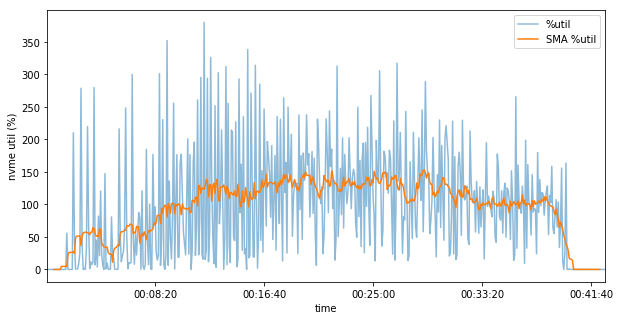

In [12]:
nvme_util = io_stat[io_stat['device'].str.contains(nvmename)].pivot_table(index='time',values=['%util'],aggfunc=sum)
fig = nvme_util.plot(alpha=0.5,figsize=(10,5))
nvme_util.rolling(window=12,center=True).mean().plot(ax=fig)
fig.set_ylabel('nvme util (%)')
fig.legend(['%util','SMA %util'])

In [27]:
nvme_util.describe()

,%util
count,514.000000
mean,93.992782
std,84.798317
min,0.000000
25%,16.505000
50%,81.450000
75%,148.255000
max,380.000000


## gpu log

In [28]:
gpu_stat = None
if os.path.exists('summary-gpu.csv'):
    gpu_stat = pd.read_csv('summary-gpu.csv',parse_dates=[0])

In [29]:
gpu_stat['time'] = pd.to_timedelta(gpu_stat['time'])

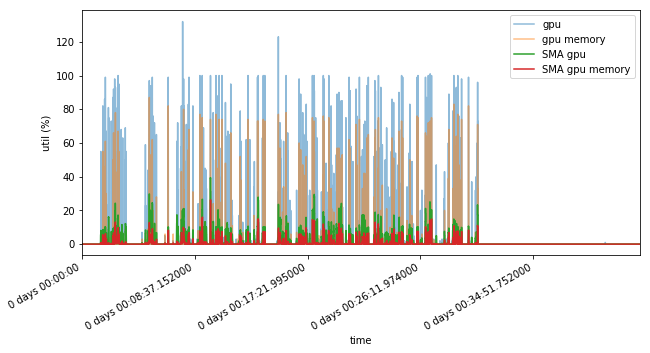

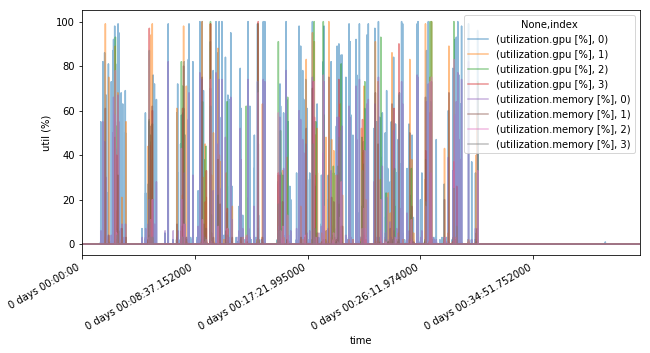

In [30]:
if gpu_stat is not None:
    gpu_util = gpu_stat.pivot_table(index='time',values=['utilization.gpu [%]','utilization.memory [%]'],aggfunc=sum)
    fig = gpu_util.plot(alpha=0.5,figsize=(10,5))
    gpu_util.rolling(window=10,center=True).mean().plot(ax=fig)
    fig.set_ylabel('util (%)')
    fig.legend(['gpu','gpu memory','SMA gpu','SMA gpu memory'])
    
    gpu_util_each = gpu_stat.pivot_table(index=['time'],columns=['index'],values=['utilization.gpu [%]','utilization.memory [%]']).fillna(0.0)
    fig = gpu_util_each.plot(alpha=0.5,figsize=(10,5))
    fig.set_ylabel('util (%)')

In [31]:
if gpu_stat is not None:
    gpu_util = gpu_stat.pivot_table(index='time',values=['utilization.gpu [%]','utilization.memory [%]'],aggfunc=sum)
    display(gpu_util.describe())

,utilization.gpu [%],utilization.memory [%]
count,9881.000000,9881.000000
mean,2.149884,0.854873
std,11.713340,6.688650
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,132.000000,87.000000
